In [1]:
using NearestNeighbors
using Colors
using CairoMakie
using AbstractTrees
using StableRNGs
import NearestNeighbors.HyperSphere
import NearestNeighbors: treeroot, leafpoints, treeregion

set_theme!(theme_dark())

[ Info: Precompiling NearestNeighbors [b8a86587-4115-5ab1-83bc-aa920d37bbce] (cache misses: include_dependency fsize change (2), wrong source (2), mismatched flags (6))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


#### This notebook generates a ball tree and then shows a few pretty plots.

In [2]:
rng = StableRNG(42)
tree = BallTree(rand(rng, 2, 100), Euclidean(); leafsize = 10)

BallTree{StaticArraysCore.SVector{2, Float64}, 2, Float64, Euclidean}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

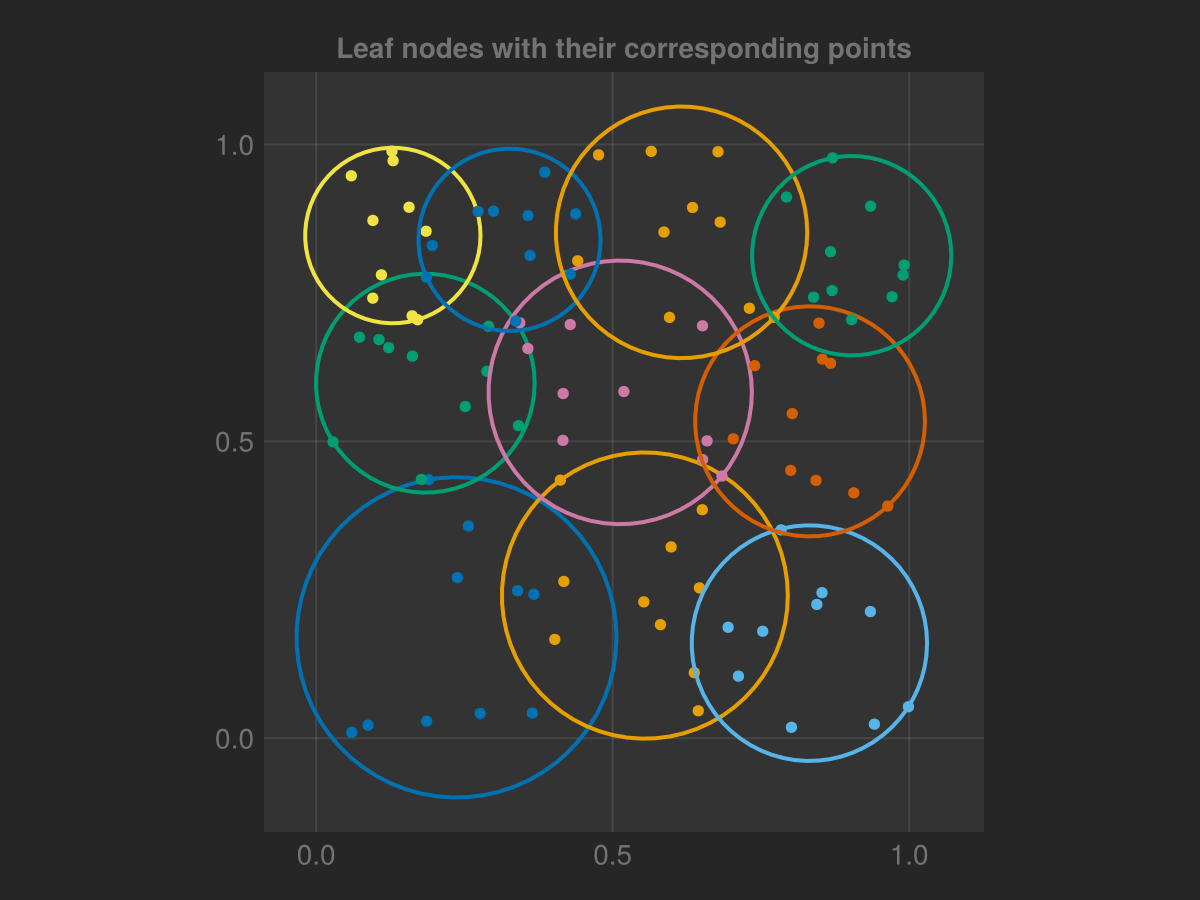

In [3]:
# Adds a sphere to an axis
function add_sphere(ax, hs::HyperSphere, color)
    lines!(ax, Circle(Point2f(hs.center), hs.r); color, linewidth=2)
end

# Iterate over the leaf nodes with the public traversal API
root = treeroot(tree)
leaf_nodes = collect(Leaves(root))
cols = Makie.wong_colors()

fig = CairoMakie.Figure(backgroundcolor=:gray15)
ax = Axis(fig[1, 1], aspect = DataAspect(), title = "Leaf nodes with their corresponding points",
          backgroundcolor=:gray20)

for (i, node) in enumerate(leaf_nodes)
    pts = leafpoints(node)
    col = cols[mod1(i, length(cols))]
    scatter!(ax, getindex.(pts, 1), getindex.(pts, 2); markersize=8, color=col)
    add_sphere(ax, treeregion(node), col)
end

fig


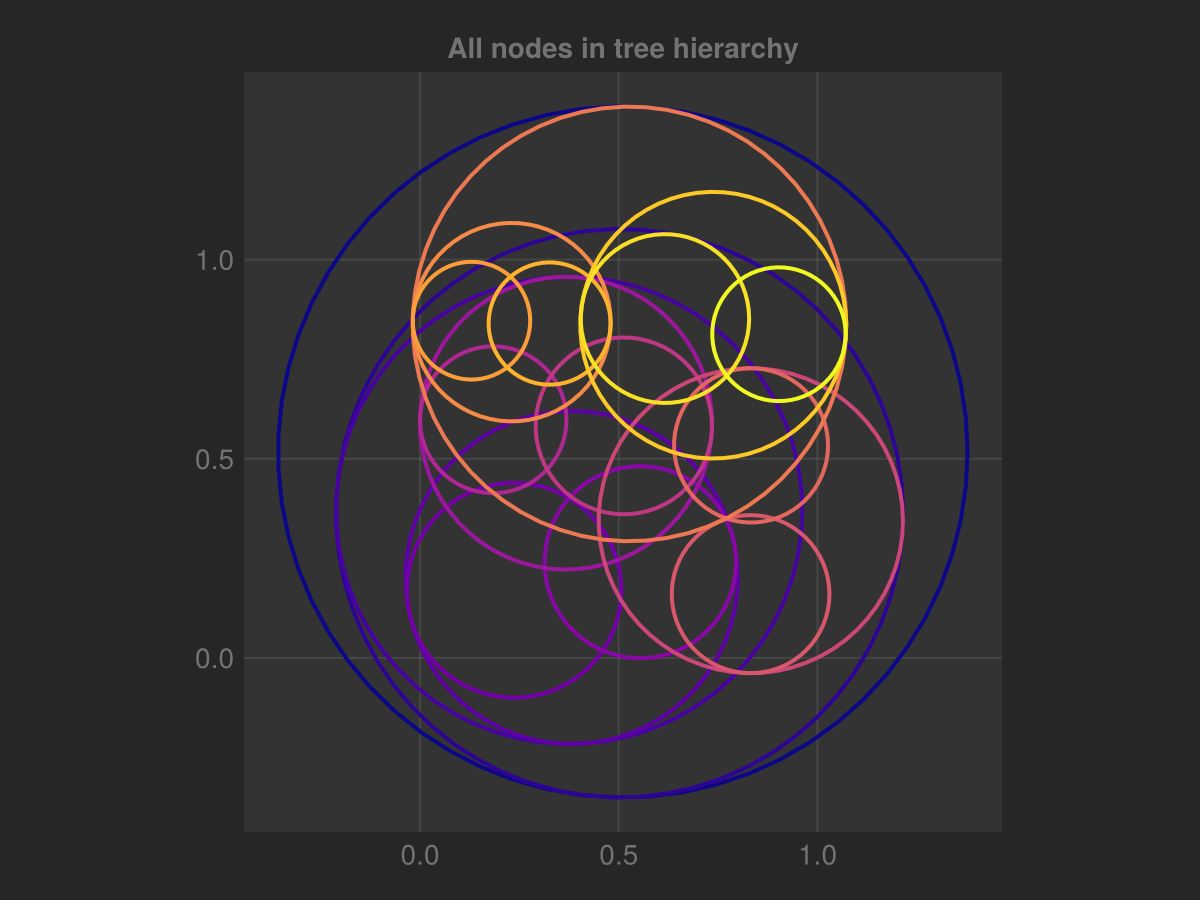

In [4]:
root = treeroot(tree)
n_nodes = length(collect(PreOrderDFS(root)))
cols = cgrad(:plasma, n_nodes, categorical=true)

fig = CairoMakie.Figure(backgroundcolor=:gray15)
ax = Axis(fig[1, 1], aspect = DataAspect(), title = "All nodes in tree hierarchy",
          backgroundcolor=:gray20)

for (i, node) in enumerate(PreOrderDFS(root))
    add_sphere(ax, treeregion(node), cols[i])
end

fig

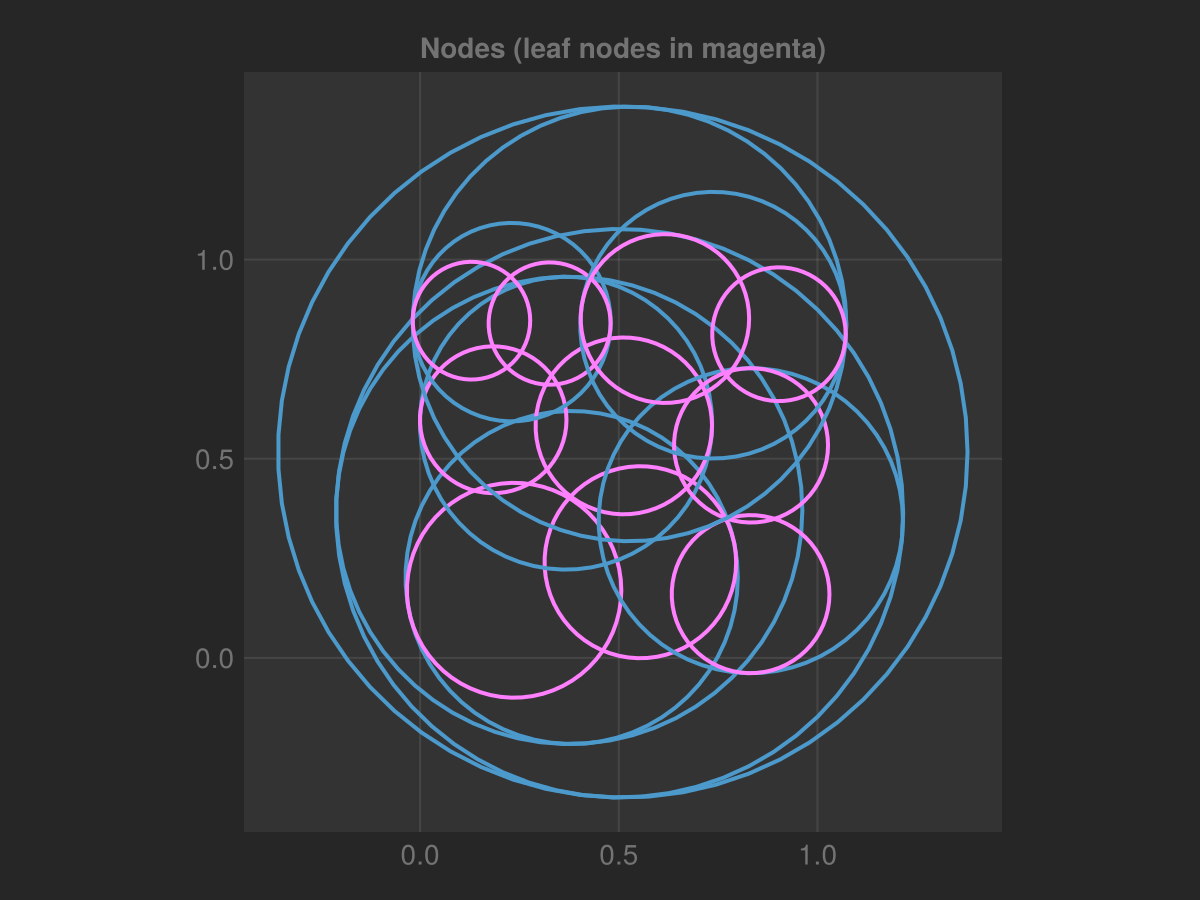

In [5]:
col_leaf = RGB(1.0, 0.5, 1.0)  # Brighter magenta for better visibility on dark background
col_internal = RGB(0.3, 0.6, 0.8)

fig = CairoMakie.Figure(backgroundcolor=:gray15)
ax = Axis(fig[1, 1], aspect = DataAspect(), title = "Nodes (leaf nodes in magenta)",
          backgroundcolor=:gray20)

for node in PreOrderDFS(treeroot(tree))
    col = isempty(children(node)) ? col_leaf : col_internal
    add_sphere(ax, treeregion(node), col)
end

fig